# Load the data, Importing Excel Files

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler
import statsmodels as sm
from string import ascii_letters
import scipy.stats


import itertools

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks

#sklearn for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm
from sklearn.model_selection import train_test_split #Data split function
from sklearn.preprocessing import LabelEncoder #OneHotEncoding
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

#Decision tree plot
import pydotplus
from IPython.display import Image

#Decision tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
covid = pd.read_excel('Data/SPSSCOVIDdataSep17.xlsx')

# Some basic analysis

In [3]:
covid.head()

,Disfear,Dissuspi,DisBritgainst,Disoppdeny,Disunequal,Disbias,Disdeny,Distreatdiff,Disuncomf,Disjoke,...,studyarea,programleng,famiUK,edu,worktime,workplace,studfund,live,wholive,SES
0,5,3,4,2,4,2,2,2,NaN,NaN,...,1,1,2,2,1,NaN,1,3,6,8
1,3,4,4,4,5,4,4,3,NaN,NaN,...,4,4,2,2,1,NaN,1,3,4,8
2,7,7,6,6,6,5,7,7,7.0,4.0,...,1,1,2,2,1,NaN,1,1,2,6
3,6,6,4,4,4,5,4,6,3.0,2.0,...,10,1,2,2,1,NaN,1,3,3,6
4,6,6,6,6,4,5,6,6,5.0,3.0,...,1,1,2,2,8,3.0,6,4,8,7


In [4]:
covid.describe()

,Disfear,Dissuspi,DisBritgainst,Disoppdeny,Disunequal,Disbias,Disdeny,Distreatdiff,Disuncomf,Disjoke,...,studyarea,programleng,famiUK,edu,worktime,workplace,studfund,live,wholive,SES
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,155.000000,155.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,55.000000,158.000000,158.000000,158.000000,158.000000
mean,4.588608,4.354430,4.367089,4.259494,3.417722,3.443038,3.556962,3.639241,2.909677,2.193548,...,8.259494,2.107595,1.892405,2.208861,2.436709,9.109091,1.373418,3.075949,3.335443,5.500000
std,1.858462,2.050558,1.731515,1.708653,1.682488,1.683542,1.800544,1.926081,1.792364,1.525101,...,5.915736,1.389613,0.310853,0.790499,2.476472,33.213492,1.043537,0.682299,2.275907,1.479155
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000,3.000000,1.250000,5.000000
50%,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.500000,3.000000,2.000000,...,8.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000,3.000000,3.000000,5.000000
75%,6.000000,6.000000,6.000000,5.000000,5.000000,4.750000,5.000000,5.000000,4.000000,3.000000,...,15.000000,3.000000,2.000000,2.000000,3.000000,3.000000,1.000000,3.000000,3.000000,6.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,20.000000,5.000000,2.000000,5.000000,8.000000,225.000000,6.000000,4.000000,9.000000,10.000000


In [5]:
covid.age # attribute access to one variable
covid['age'] # attribute access to one variable

0      22
1      18
2      24
3      25
4      28
       ..
153    20
154    23
155    27
156    29
157    33
Name: age, Length: 158, dtype: int64

In [6]:
covid["gender"].value_counts()

2    117
1     37
4      4
Name: gender, dtype: int64

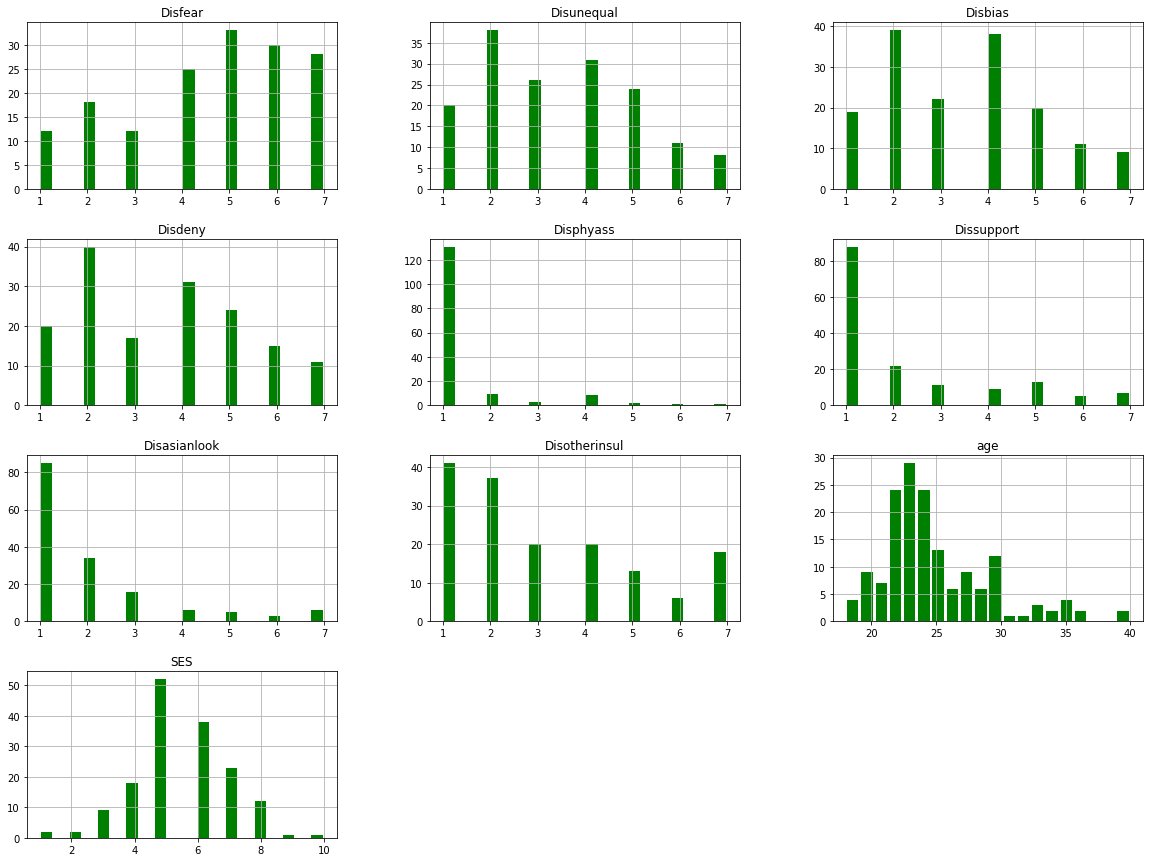

In [7]:
analysisvars = [ 'Disfear', 'Disunequal', 'Disbias', 'Disdeny', 'Disphyass', 'Dissupport', 'Disasianlook', 'Disotherinsul', 'age', 'SES']

# setting the ranges and no. of intervals
#range = (0, 100)
bins = 10 
 
# plotting a histogram. figsize= (y-width,x-width)  bins = smaller the bars wider. rwidth the gap between bars.
covid.hist(analysisvars, color = 'green', histtype = 'bar', rwidth = 0.8, bins=20, figsize = (20,15))

# x-axis label
plt.xlabel('Totally disagree - Totally agree')

# frequency label
plt.ylabel('frequencies')

# plot title
#plt.title('My histogram')
 
# function to show the plot
plt.show()

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

num_pipeline = Pipeline([
    ('imputer',KNNImputer(n_neighbors=5)),
])

covid_tsf = num_pipeline.fit_transform(covid)

# Since the pipeline transformed variable is a Numpy array, we need to transform it into a pandas dataframe.

cols = covid.columns
print(cols)

# If there are both categorical and numeric attributes

#covid_cat = covid.select_dtypes(include="object").columns
#covid_int = covid.select_dtypes(exclude="object").columns

covidtsf = pd.DataFrame(covid_tsf, columns=cols)

covidtsf.head()

# pandas.DataFrame.reindex
# Conform Series/DataFrame to new index with optional filling logic.
# Places NA/NaN in locations having no value in the previous index. 
# A new object is produced unless the new index is equivalent to the current one and copy=False.
# axis : {0, 1, …}, default 0 (0 dimension which is row), 1 dimension is the column. The axis to concatenate along.

Index(['Disfear', 'Dissuspi', 'DisBritgainst', 'Disoppdeny', 'Disunequal',
       'Disbias', 'Disdeny', 'Distreatdiff', 'Disuncomf', 'Disjoke',
       ...
       'studyarea', 'programleng', 'famiUK', 'edu', 'worktime', 'workplace',
       'studfund', 'live', 'wholive', 'SES'],
      dtype='object', length=203)


,Disfear,Dissuspi,DisBritgainst,Disoppdeny,Disunequal,Disbias,Disdeny,Distreatdiff,Disuncomf,Disjoke,...,studyarea,programleng,famiUK,edu,worktime,workplace,studfund,live,wholive,SES
0,5.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,2.0,2.0,1.0,3.0,1.0,3.0,6.0,8.0
1,3.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,4.8,4.2,...,4.0,4.0,2.0,2.0,1.0,3.0,1.0,3.0,4.0,8.0
2,7.0,7.0,6.0,6.0,6.0,5.0,7.0,7.0,7.0,4.0,...,1.0,1.0,2.0,2.0,1.0,3.0,1.0,1.0,2.0,6.0
3,6.0,6.0,4.0,4.0,4.0,5.0,4.0,6.0,3.0,2.0,...,10.0,1.0,2.0,2.0,1.0,3.0,1.0,3.0,3.0,6.0
4,6.0,6.0,6.0,6.0,4.0,5.0,6.0,6.0,5.0,3.0,...,1.0,1.0,2.0,2.0,8.0,3.0,6.0,4.0,8.0,7.0


# Select feature(X) and label(y) variables
Create a new dataframe "features" that stores all explanatory/independent/feature variables that we will use to explain/predict whether customers will buy our newly found combined products.

In [51]:
features = ['Disuncomf','Disjoke','Disphyass', 'Disasianlook', 'Disotherinsul', 'GenDis151', 'GenDis152', 'gender']
X = covidtsf[features]
X.head()

,Disuncomf,Disjoke,Disphyass,Disasianlook,Disotherinsul,GenDis151,GenDis152,gender
0,2.0,2.0,1.0,1.2,2.0,1.0,1.0,2.0
1,4.8,4.2,3.0,3.8,4.4,2.0,2.0,2.0
2,7.0,4.0,1.0,3.0,7.0,5.0,5.0,2.0
3,3.0,2.0,1.0,2.0,5.0,2.0,2.0,2.0
4,5.0,3.0,1.0,3.0,4.0,5.0,5.0,1.0


In [24]:
labels = ['UniSatisfaction']
y = covidtsf[labels]
y

,UniSatisfaction
0,6.0
1,6.0
2,3.0
3,6.0
4,2.0
...,...
153,5.0
154,3.0
155,7.0
156,5.0


# Create a Test Set
You should split before pre-processing or imputing.

The division between training and test set is an attempt to replicate the situation where you have past information and are building a model which you will test on future as-yet unknown question/situation: the training set takes the place of the past and the test set takes the place of the future, so you only get to test your trained model once.

Keeping the past/future analogy in mind, this means anything you do to pre-process or process your data, such as imputing missing values, you should do on the training set alone. 

You can then remember what you did to your training set if your test set also needs pre-processing or imputing, so that you do it the same way on both sets.

Added from comments: if you use the test data to affect the training data, then the test data is being used to build your model, so it ceases to be test data and will not provide a fair test of your model. You risk overfitting, and it was to discourage this that you separated out the test data in the first place.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12345)# This is python return multiple values
# the problem with this is that you run the risk of introducing a significant sampling bias

In [12]:
X_train

,Disphyass,Disjoke,Disasianlook,Disotherinsul,GenDis151,GenDis152,gender
151,1.0,1.0,1.0,1.0,3.0,2.0,2.0
104,1.0,1.0,1.0,1.0,4.0,4.0,1.0
92,1.0,2.0,1.0,2.0,1.0,1.0,2.0
9,1.0,1.0,1.0,4.0,2.0,3.0,2.0
70,6.0,6.0,7.0,6.0,7.0,6.0,1.0
...,...,...,...,...,...,...,...
34,4.0,4.0,1.0,2.0,3.0,3.0,1.0
101,1.0,2.0,2.0,3.0,4.0,4.0,2.0
126,1.0,2.0,1.0,7.0,2.0,2.0,2.0
129,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
y_train

,UniRecom
151,7.0
104,4.0
92,7.0
9,7.0
70,1.0
...,...
34,7.0
101,5.0
126,6.0
129,6.0


## Stratified Shuffle Split
First cut the SES variable into four parts. Then, use scikitlearn stratified sampling. 



split(X, y, groups=None)[source]
Generate indices to split data into training and test set.

Parameters
Xarray-like of shape (n_samples, n_features)
Training data, where n_samples is the number of samples and n_features is the number of features.

Note that providing y is sufficient to generate the splits and hence np.zeros(n_samples) may be used as a placeholder for X instead of actual training data.

yarray-like of shape (n_samples,) or (n_samples, n_labels)
The target variable for supervised learning problems. Stratification is done based on the y labels.

groupsobject
Always ignored, exists for compatibility.

Yields
trainndarray
The training set indices for that split.

testndarray
The testing set indices for that split.

In [38]:
SES = covid["SES"]
SES

0       8
1       8
2       6
3       6
4       7
       ..
153    10
154     6
155     3
156     9
157     5
Name: SES, Length: 158, dtype: int64

<AxesSubplot:>

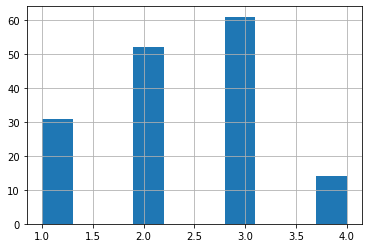

In [39]:
covid["SES_cat"] = pd.cut(SES, bins=[0.,4.0,5.0,7.0,10.0], labels=[1,2,3,4])
covid["SES_cat"].hist()

In [40]:
# Do stratified sampling based on the income category

from sklearn.model_selection import StratifiedShuffleSplit # class

# Always create an instance of the library class
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42) # (n_splits:number of reshuffling & splitting iterations, 
# test_size:If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. 
# random_state:Controls the randomness of the training and testing indices produced. Pass an int for reproducible output across multiple function calls. )

#split.get_n_splits(X,y)

#print(split)

# Using a for loop to create an array of index numbers, which means which rows of data instances will be used as train or test. 
# train set is 0.8 of original data, test set is 0.2 of original data
for train_index, test_index in split.split(covid,covid["SES_cat"]):
    strat_train_set = covid.loc[train_index]
    strat_test_set = covid.loc[test_index]

In [41]:
strat_train_set

,Disfear,Dissuspi,DisBritgainst,Disoppdeny,Disunequal,Disbias,Disdeny,Distreatdiff,Disuncomf,Disjoke,...,programleng,famiUK,edu,worktime,workplace,studfund,live,wholive,SES,SES_cat
15,5,2,4,5,5,5,5,5,3.0,2.0,...,3,2,2,1,NaN,1,3,3,6,3
32,2,2,2,6,2,2,4,2,2.0,2.0,...,1,2,2,3,3.0,1,4,1,8,4
43,7,7,4,7,4,4,4,2,4.0,3.0,...,1,2,2,1,NaN,1,3,3,5,2
140,2,2,2,2,2,2,2,2,2.0,2.0,...,1,2,3,8,3.0,1,3,1,5,2
143,6,7,5,5,5,5,5,6,5.0,2.0,...,5,1,4,2,3.0,1,3,2,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,6,4,6,4,3,3,3,3,3.0,2.0,...,3,2,2,1,NaN,1,3,3,4,1
67,4,2,2,4,4,4,4,3,5.0,2.0,...,1,2,2,1,NaN,1,3,3,5,2
91,6,7,6,5,5,5,7,6,7.0,3.0,...,1,2,2,1,NaN,1,1,2,5,2
114,6,6,7,5,7,6,4,5,4.0,7.0,...,4,2,1,1,NaN,1,4,6,5,2


In [62]:
# check the category proportions in the test set

split.get_n_splits(covid, covid["SES_cat"]) #Returns the number of splitting iterations in the cross-validator

len(strat_test_set) # calculate the length of any iterable object.

strat_test_set["SES_cat"].value_counts() # value_counts() function returns object containing counts of unique values. 
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

strat_test_set["SES_cat"].value_counts()/len(strat_test_set)

3    0.395833
2    0.333333
1    0.187500
4    0.083333
Name: SES_cat, dtype: float64

In [61]:
covid["SES_cat"].value_counts() / len(covid)

3    0.386076
2    0.329114
1    0.196203
4    0.088608
Name: SES_cat, dtype: float64

In [63]:
def SES_cat_proportions(data):         #define a function that return SES cat proportions
    return data["SES_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(covid, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": SES_cat_proportions(covid),
    "Stratified": SES_cat_proportions(strat_test_set),
    "Random": SES_cat_proportions(test_set),
}).sort_index()


compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100 # what is this doing here? 
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [64]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.196203,0.187500,0.28125,43.346774,-4.435484
2,0.329114,0.333333,0.25000,-24.038462,1.282051
3,0.386076,0.395833,0.40625,5.225410,2.527322
4,0.088608,0.083333,0.06250,-29.464286,-5.952381


In [65]:
train_set

,Disfear,Dissuspi,DisBritgainst,Disoppdeny,Disunequal,Disbias,Disdeny,Distreatdiff,Disuncomf,Disjoke,...,programleng,famiUK,edu,worktime,workplace,studfund,live,wholive,SES,SES_cat
137,1,5,4,7,5,2,1,1,4.0,1.0,...,5,2,4,2,3.0,2,3,9,4,1
55,5,6,6,6,4,3,7,4,2.0,2.0,...,1,2,2,4,3.0,1,4,8,4,1
126,1,1,7,5,5,4,6,6,3.0,2.0,...,1,2,2,8,3.0,1,4,9,5,2
84,5,5,4,5,4,4,4,4,2.0,2.0,...,4,2,3,7,3.0,2,4,1,5,2
154,5,7,7,5,5,6,5,5,6.0,7.0,...,3,2,3,1,NaN,1,4,3,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2,1,2,2,2,2,2,3,2.0,1.0,...,1,2,2,1,NaN,1,4,7,1,1
106,1,2,6,3,3,3,6,3,2.0,1.0,...,1,2,2,1,NaN,1,3,1,5,2
14,5,3,6,4,4,4,4,5,4.0,4.0,...,1,1,2,2,3.0,1,3,3,7,3
92,3,2,2,2,3,2,2,1,3.0,2.0,...,1,1,2,1,NaN,1,3,3,5,2


In [68]:
test_set.head()

,Disfear,Dissuspi,DisBritgainst,Disoppdeny,Disunequal,Disbias,Disdeny,Distreatdiff,Disuncomf,Disjoke,...,programleng,famiUK,edu,worktime,workplace,studfund,live,wholive,SES,SES_cat
128,4,4,5,4,4,4,4,4,1.0,1.0,...,4,2,3,4,6.0,1,4,8,6,3
45,1,7,5,5,1,1,1,1,1.0,1.0,...,1,2,2,1,NaN,1,3,3,3,1
134,4,2,4,3,3,3,3,4,4.0,4.0,...,4,2,4,1,NaN,4,3,1,4,1
156,5,3,3,1,4,2,2,3,1.0,1.0,...,4,2,3,8,1.0,2,3,1,9,4
90,6,5,4,3,2,2,2,3,2.0,1.0,...,1,2,2,1,NaN,1,3,1,5,2


# Prepare the data for machine learning algorithms


In [74]:
y_train = strat_train_set["UniSatisfaction"].copy()
y_test= strat_test_set["UniSatisfaction"].copy()


features = ['Disuncomf','Disjoke','Disphyass', 'Disasianlook', 'Disotherinsul', 'GenDis151', 'GenDis152','GenDis176']

x_train = strat_test_set[features]
X_test = strat_test_set[features]


y_train

15     6.0
32     5.0
43     5.0
140    5.0
143    2.0
      ... 
26     6.0
67     6.0
91     5.0
114    5.0
65     4.0
Name: UniSatisfaction, Length: 110, dtype: float64

## Transformation Pipelines
Now let's build a pipeline for preprocessing the numerical attributes:

In [139]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


# can also add scaler there: ('std_scaler', StandardScaler())

num_pipeline = Pipeline([
    ('imputer',KNNImputer(n_neighbors=5)),
])

train_tsf = num_pipeline.fit_transform(strat_train_set)

# Since the pipeline transformed variable is a Numpy array, we need to transform it into a pandas dataframe.

cols = strat_train_set.columns
print(cols)

# If there are both categorical and numeric attributes

#covid_cat = covid.select_dtypes(include="object").columns
#covid_int = covid.select_dtypes(exclude="object").columns

traintsf = pd.DataFrame(train_tsf, columns=cols)

traintsf.head()

# pandas.DataFrame.reindex
# Conform Series/DataFrame to new index with optional filling logic.
# Places NA/NaN in locations having no value in the previous index. 
# A new object is produced unless the new index is equivalent to the current one and copy=False.
# axis : {0, 1, …}, default 0 (0 dimension which is row), 1 dimension is the column. The axis to concatenate along.


Index(['Disfear', 'Dissuspi', 'DisBritgainst', 'Disoppdeny', 'Disunequal',
       'Disbias', 'Disdeny', 'Distreatdiff', 'Disuncomf', 'Disjoke',
       ...
       'programleng', 'famiUK', 'edu', 'worktime', 'workplace', 'studfund',
       'live', 'wholive', 'SES', 'SES_cat'],
      dtype='object', length=204)


,Disfear,Dissuspi,DisBritgainst,Disoppdeny,Disunequal,Disbias,Disdeny,Distreatdiff,Disuncomf,Disjoke,...,programleng,famiUK,edu,worktime,workplace,studfund,live,wholive,SES,SES_cat
0,5.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,2.0,...,3.0,2.0,2.0,1.0,3.0,1.0,3.0,3.0,6.0,3.0
1,2.0,2.0,2.0,6.0,2.0,2.0,4.0,2.0,2.0,2.0,...,1.0,2.0,2.0,3.0,3.0,1.0,4.0,1.0,8.0,4.0
2,7.0,7.0,4.0,7.0,4.0,4.0,4.0,2.0,4.0,3.0,...,1.0,2.0,2.0,1.0,3.0,1.0,3.0,3.0,5.0,2.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,3.0,8.0,3.0,1.0,3.0,1.0,5.0,2.0
4,6.0,7.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,2.0,...,5.0,1.0,4.0,2.0,3.0,1.0,3.0,2.0,6.0,3.0


## ColumnTransformer
If our data have categorical columns and numerical columns. Have single transformer to handle all columns, applying the appropriate transformations to each column.

In [140]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

train_cat = traintsf.select_dtypes(include="object").columns
train_int = traintsf.select_dtypes(exclude="object").columns

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, train_cat),
        ("cat", OneHotEncoder(), train_int),
]
)

covid_prepared = full_pipeline.fit_transform(traintsf)


In [75]:
covid_prepared

<110x1552 sparse matrix of type '<class 'numpy.float64'>'
	with 22440 stored elements in Compressed Sparse Row format>

## Select feature(X) and label(y) variables

In [236]:
y_train = traintsf["UniRecom"]
y_test= strat_test_set["UniRecom"]


features = ['Disuncomf','Disjoke','Disphyass', 'Disasianlook', 'Disotherinsul', 'GenDis151', 'GenDis152','GenDis176',
            'SupportAAHC_Uni','GenDis178','GenDis179']

X_train = traintsf[features]
X_test = strat_test_set[features]


X_train


,Disuncomf,Disjoke,Disphyass,Disasianlook,Disotherinsul,GenDis151,GenDis152,GenDis176,SupportAAHC_Uni,GenDis178,GenDis179
0,3.0,2.0,1.0,1.0,5.0,3.0,6.0,2.0,7.0,5.0,4.0
1,2.0,2.0,1.0,1.0,2.0,2.0,3.0,7.0,6.0,7.0,7.0
2,4.0,3.0,3.0,3.0,6.0,4.0,4.0,4.0,6.0,4.0,4.0
3,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0
4,5.0,2.0,1.0,1.0,5.0,4.0,4.0,3.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
105,3.0,2.0,1.0,2.0,2.0,2.0,2.0,4.0,2.0,6.0,2.0
106,5.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0,4.0,2.0,3.0
107,7.0,3.0,1.0,2.0,1.0,4.0,4.0,2.0,5.0,2.0,6.0
108,4.0,7.0,1.0,3.0,7.0,2.0,3.0,2.0,6.0,6.0,2.0


## Reshape 1D series to 2D array 

ndarray.reshape()

A frequently used method of ndarray is ndarray.reshape(), it returns a new shape to an array without changing its data. The mandatory parameter of .reshape() is 'shape' which should be the new shape represented by an int or a tuple of ints, it should be compatible with the original shape. If an integer, then the result will be a 1-D array of that length. One shape dimension can be -1, in this case, the value is inferred from the length of the array and remaining dimensions.

create a 1-D numpy array

P = np.array([1,2,3,4,5,6,7,8])  
print('P:\n',P)
print('The shape of P is: ',P.shape)   

reshape P to a 2-D array, the size of the second dimension is 1, the first dimension is inferred

P_1 = P.reshape((-1,1)) 
print('\nP_1:\n',P_1)
print('The shape of P_1 is: ',P_1.shape)

reshape P to a 2-D array with the shape (2,4)

P_2 = P.reshape((2,4))  
print('\nP_2:\n',P_2)
print('The shape of P_2 is: ',P_2.shape)

In [237]:
y_train = np.array(y_train).reshape((-1,1))

y_test = np.array(y_test).reshape((-1,1))

# LabelEncoder

LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1. This is sometimes useful for writing efficient Cython routines.

These are transformers that are not intended to be used on features, only on supervised learning targets. See also Transforming target in regression if you want to transform the prediction target for learning, but evaluate the model in the original (untransformed) space.

You are passing floats to a classifier which expects categorical values as the target vector. If you convert it to int it will be accepted as input (although it will be questionable if that's the right way to do it).

It would be better to convert your training scores by using scikit's labelEncoder function.

In [238]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import OrdinalEncoder

# y_test is now a 1D series, reshape it to 2D array


enc = preprocessing.OrdinalEncoder()
y_train_e = enc.fit_transform(y_train)
y_test_e = enc.fit_transform(y_test)

#print(utils.multiclass.type_of_target(covid_labels))

#print(utils.multiclass.type_of_target(covid_labels.astype('int')))

print(utils.multiclass.type_of_target(y_test_e))

multiclass


In [239]:

# a function to clean the dataset of nan, Inf, and missing cells (for skewed datasets)

import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

# Select and Train a model on the training set

# Tree model
The label (y) variable need to be encoded either using label encoder or ordinal encoder from continuous (int) to multiclass variable. 

Decision trees don't require feature scaling or centering at all. 

In [240]:
#Define and fit the Decision tree classifier with some default parameters
clf = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=2, 
                             min_samples_leaf=3)

# we will use this variable to store the resulting training and validation errors for each 
tr_errors, ts_errors = [], []

clf.fit(X_train,y_train_e)

#Use classifier to predict labels
y_pred_train = clf.predict(X_train) #predict values for the training data using the Tree classifier model

tr_error_MSE = mean_squared_error(y_train,y_pred_train) #calculate the training error

tr_error_MAE = mean_absolute_error(y_train, y_pred_train)

y_pred_test = clf.predict(X_test)

ts_error_MSE = mean_squared_error(y_test_e,y_pred_test)

ts_error_MAE = mean_absolute_error(y_test, y_pred_test)

tr_errors.extend([tr_error_MSE,tr_error_MAE])
ts_errors.extend([ts_error_MSE,ts_error_MAE])

print(tr_errors)
print(ts_errors)

[1.9832727272727273, 0.9309090909090909]
[7.4375, 1.1875]


In [234]:
print ("Accuracy is: ", (accuracy_score(y_test,y_pred_test)*100).round(2))

Accuracy is:  14.58


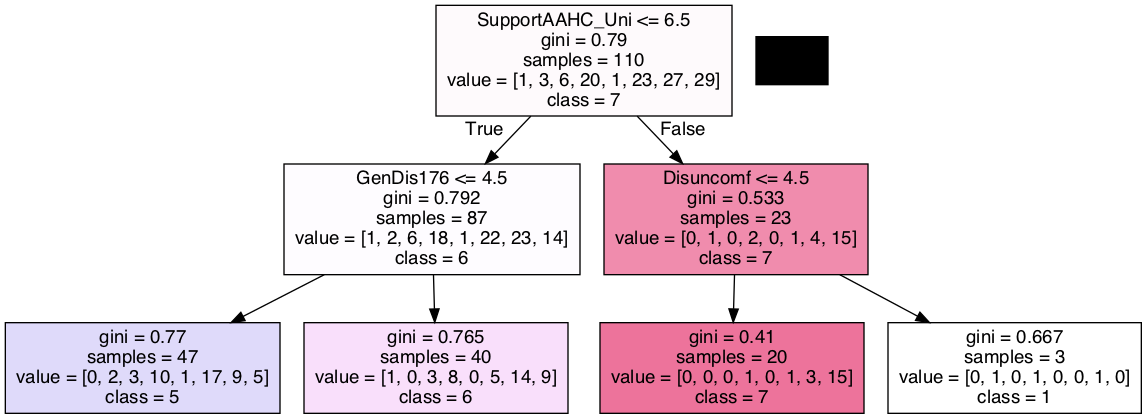

In [242]:
'''
The graphviz library is used to visualize the tree. 
'''
from sklearn.tree import export_graphviz

# Create DOT data
dot_data = tree.export_graphviz(clf, out_file= None, 
                                feature_names=X_train.columns, 
                                class_names= ['0','1','2','3','4','5','6','7'],
                                filled=True) #or use y_train.unique()

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Create PNG 
#graph.write_png("clf.png") #uncomment this line to save the plot as a .png file

In [207]:
#Define and fit the Decision tree classifier with some default parameters

regressor = DecisionTreeRegressor(random_state=0)

cross_val_score(regressor, X_train, y_train, cv=10)

regressor.fit(X_train,y_train)

# we will use this variable to store the resulting training and validation errors for each 
tr_errors, ts_errors = [], []


#Use classifier to predict labels
y_pred_train = regressor.predict(X_train) #predict values for the training data using the Tree classifier model

tr_error_MSE = mean_squared_error(y_train,y_pred_train) #calculate the training error

tr_error_MAE = mean_absolute_error(y_train, y_pred_train)

y_pred_test = regressor.predict(X_test)

ts_error_MSE = mean_squared_error(y_test,y_pred_test)

ts_error_MAE = mean_absolute_error(y_test, y_pred_test)

tr_errors.extend([tr_error_MSE,tr_error_MAE])
ts_errors.append(ts_error_MSE)
ts_errors.append(ts_error_MAE)

print(tr_errors)
print(ts_errors)

[0.004545454545454545, 0.00909090909090909]
[3.671875, 1.5104166666666667]


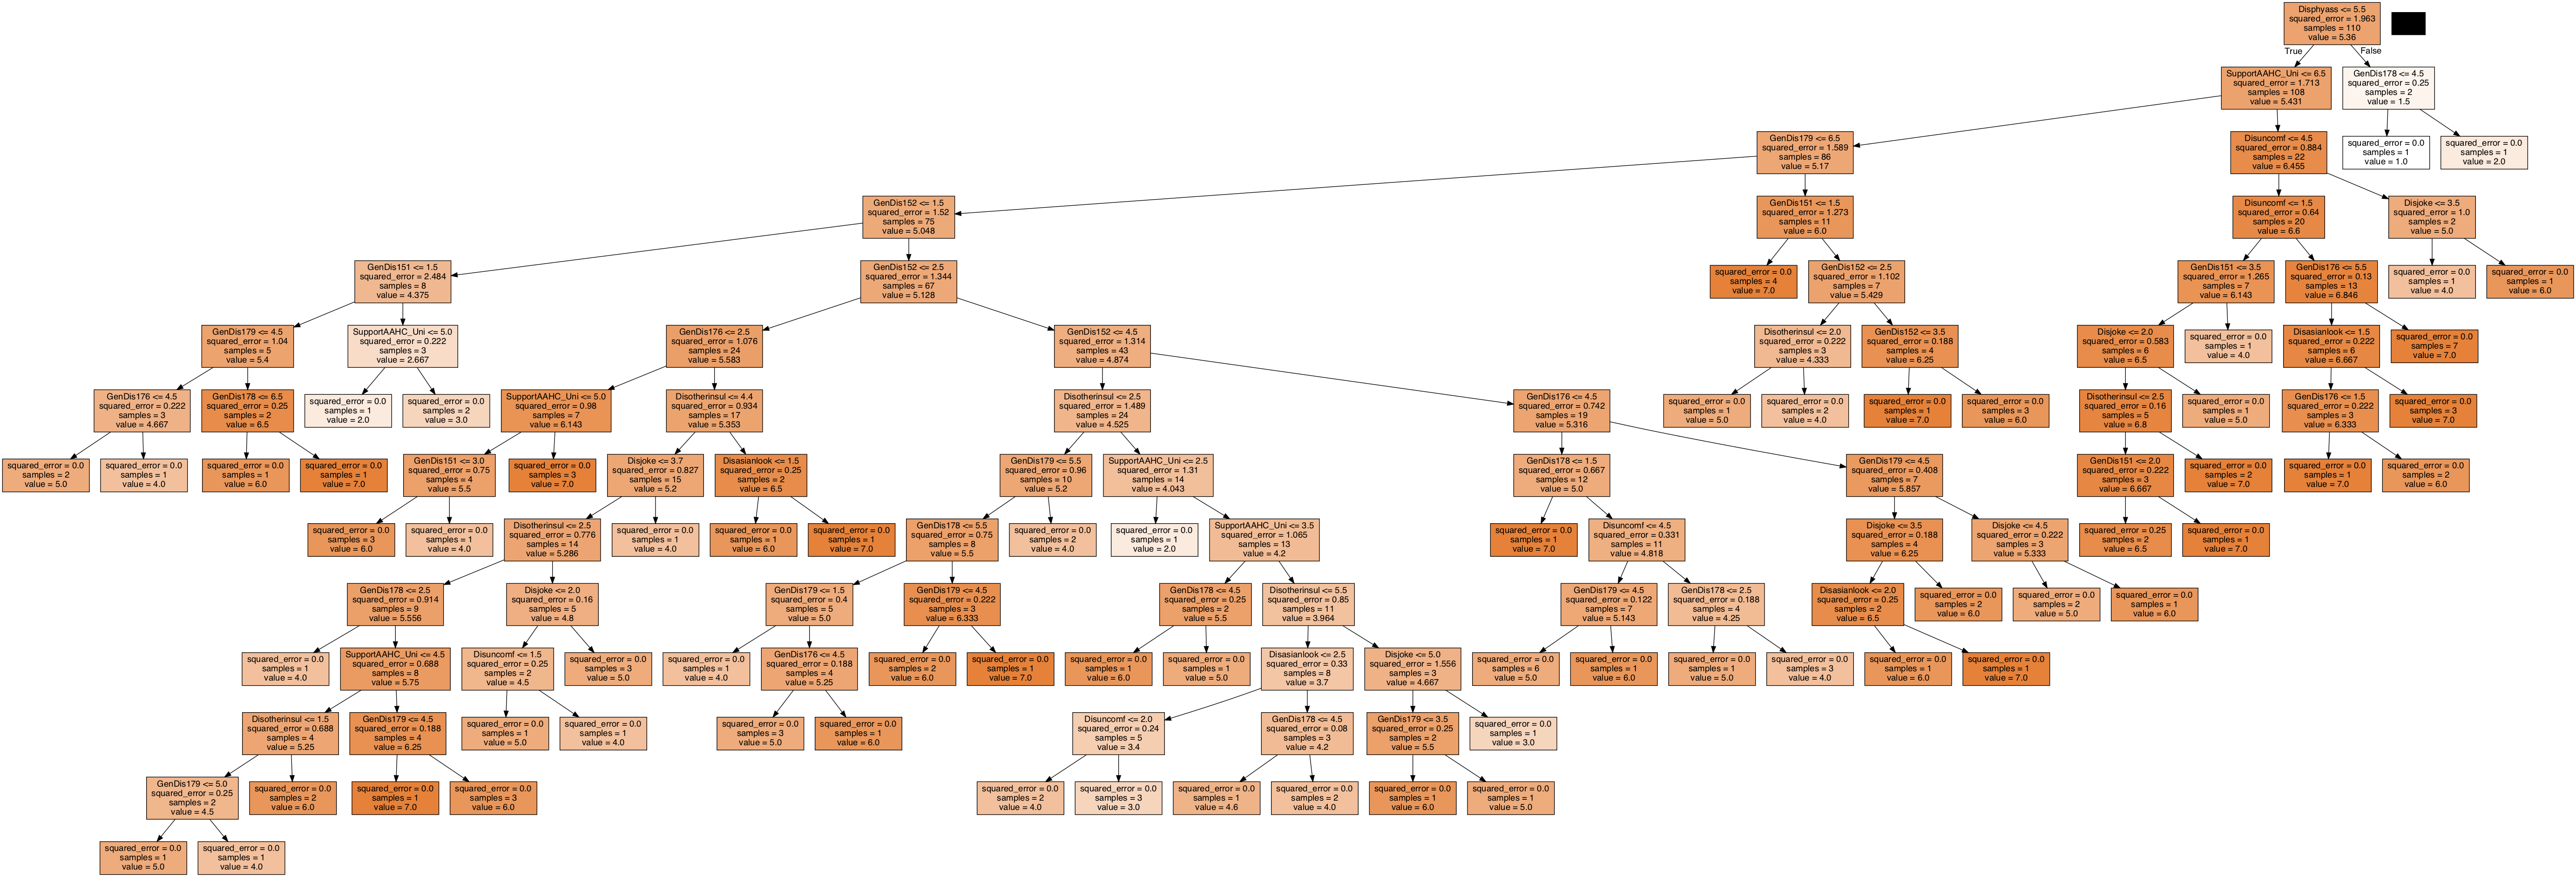

In [243]:
'''
The graphviz library is used to visualize the tree. 
'''
from sklearn.tree import export_graphviz

# Create DOT data
dot_data = tree.export_graphviz(regressor, out_file= None, 
                                feature_names=X_train.columns, 
                                class_names= ['0','1','2','3','4','5','6','7'],
                                filled=True) #or use y_train.unique()

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Create PNG 
#graph.write_png("clf.png") #uncomment this line to save the plot as a .png file

# KNN K-Nearest Neighbor 

## Eager Vs. Lazy Learners,

    "Eager learners mean when given training points will construct a generalized model before performing prediction on given new points to classify. You can think of such learners as being ready, active and eager to classify unobserved data points.\n",
    "Lazy Learning means there is no need for learning or training of the model and all of the data points used at the time of prediction. Lazy learners wait until the last minute before classifying any data point. Lazy learner stores merely the training dataset and waits until classification needs to perform. Only when it sees the test tuple does it perform generalization to classify the tuple based on its similarity to the stored training tuples. Unlike eager learning methods, lazy learners do less work in the training phase and more work in the testing phase to make a classification. Lazy learners are also known as instance-based learners because lazy learners store the training points or instances, and all learning is based on instances.\n",

## Curse of Dimensionality",

    "KNN performs better with a lower number of features than a large number of features. You can say that when the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality.\n",
    "To deal with the problem of the curse of dimensionality, you need to perform principal component analysis before applying any machine learning algorithm, or you can also use feature selection approach. Research has shown that in large dimension Euclidean distance is not useful anymore. Therefore, you can prefer other measures such as cosine similarity, which get decidedly less affected by high dimension.\n",

## How do you decide the number of neighbors in KNN?

    "Now, you understand the KNN algorithm working mechanism. At this point, the question arises that How to choose the optimal number of neighbors? And what are its effects on the classifier? The number of neighbors(K) in KNN is a hyperparameter that you need choose at the time of model building. You can think of K as a controlling variable for the prediction model.\n",
    "Research has shown that no optimal number of neighbors suits all kind of data sets. Each dataset has it's own requirements. In the case of a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive. Research has also shown that a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.\n",
    "Generally, Data scientists choose as an odd number if the number of classes is even. You can also check by generating the model on different values of k and check their performance. You can also try Elbow method here."

Problem: A column-vector y was passed when a 1d array was expected. 

.values will give the values in a numpy array (shape: (n,1))

.ravel will convert that array shape to (n, ) (i.e. flatten it)

In [250]:


# Create KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)

#Train the model using the training sets

knn.fit(X_train,y_train_e.ravel())

#Predict the response for the test dataset

#y_pred = knn.predict(X_test)

# we will use this variable to store the resulting training and validation errors for each 
tr_errors, ts_errors = [], []

y_pred_train = knn.predict(X_train) #predict values for the training data using the Tree classifier model

tr_error_MSE = mean_squared_error(y_train,y_pred_train) #calculate the training error

tr_error_MAE = mean_absolute_error(y_train, y_pred_train)

y_pred_test = knn.predict(X_test)

ts_error_MSE = mean_squared_error(y_test,y_pred_test)

ts_error_MAE = mean_absolute_error(y_test, y_pred_test)

tr_errors.extend([tr_error_MSE,tr_error_MAE])
ts_errors.extend([ts_error_MSE,ts_error_MAE])

print(tr_errors)
print(ts_errors)


[2.4287272727272726, 1.1400000000000001]
[3.3541666666666665, 1.3541666666666667]


### Model Evaluation for k=5
Let's estimate, how accurately the classifier or model can predict the type of cultivars. Accuracy can be computed by comparing actual test set values and predicted values.

In [209]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.20833333333333334


The accuracy is about 18%, it is a very bad accuracy. Consider create a different model. 

In [222]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=15)

#Train the model using the training sets
knn.fit(X_train, y_train_e.ravel())

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3125


When the KNN model neighbor is tuned to 15, the classification accuracy rate is about 0.3125, which is approximately the maximum it can achieve. 